# 90 Day Fiance - decision tree

Question: which factor(s) determine if a copuple will stay together?

references: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py
https://www.w3schools.com/python/python_ml_decision_tree.asp

*Classification is a two-step process, **learning step** and **prediction step**.* 

*In the learning step, the model is developed based on given training data.*

*In the prediction step, the model is used to predict the response for given data.*

***Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.***

## Decision Tree Classifier Building in Scikit-learn

### Importing Required Libraries

In [1]:
# load libraries
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


# import decision tree dlassifier
from sklearn.tree import DecisionTreeClassifier

# import train_test_split function
from sklearn.model_selection import train_test_split

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

import pydotplus

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

In [19]:
# load 90 Day data

fiances = pd.read_csv("data/90-Day-Fiance-regression.csv")

In [20]:
fiances.head()

,usSex,usAgeRange,usRegion,foreignSex,foreignAgeRange,olderSex,olderNat,ageDiffRange,continent,met,stayTogether
0,0,1,2,1,1,0,0,1,1,1,1
1,0,1,0,1,1,0,0,2,1,2,1
2,0,2,1,1,2,0,0,1,4,0,1
3,0,2,1,1,1,0,0,2,2,0,1
4,1,1,1,0,1,0,1,1,0,1,0


In [21]:
fiances.shape

(58, 11)

### Feature Selection

* divide given columns into two types of variables: **dependent(or target variable)** and **independent variable(or feature variables)**

In [22]:
fiances.columns

Index(['usSex', 'usAgeRange', 'usRegion', 'foreignSex', 'foreignAgeRange',
       'olderSex', 'olderNat', 'ageDiffRange', 'continent', 'met',
       'stayTogether'],
      dtype='object')

In [23]:
# split dataset in features and target variable

features = ['usSex', 'usAgeRange', 'usRegion', 'foreignAgeRange', 'olderSex', 'olderNat', 
                 'ageDiffRange', 'continent', 'met', ]

# features
X = fiances[features] 

# target variable
y = fiances.stayTogether

### Splitting Data

* to understand model performance: divide dataset into a training set and a test set

* split the dataset by using function **train_test_split()**

* pass 3 parameters **features**, **target**, and **test_set size**

In [24]:
# split dataset into training set and test set

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

### Building Decision Tree Model

* create a Decision Tree Model using **Scikit-learn**

In [25]:
# create decision tree classifer object
clf = DecisionTreeClassifier()

# train decision tree classifer
clf = clf.fit(X_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

* Let's estimate: how accurately the classifier / model can predict which couples stay together

* Accuracy can be computed by comparing actual test set values and predicted values

In [26]:
# model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### Visualizing Decision Trees

* use Scikit-learn's **export_graphviz** function for display the tree within a Jupyter notebook

* for plotting tree, you also need to install **graphviz** and **pydotplus**

* export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter

* in the decision tree chart, each internal node has a decision rule that splits the data

* **Gini** referred as **Gini ratio**, which measures the impurity of the node

* you can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node

* here, the resultant tree is unpruned -  **unpruned tree is unexplainable and not easy to understand**

* in the next section, **optimize it by pruning**

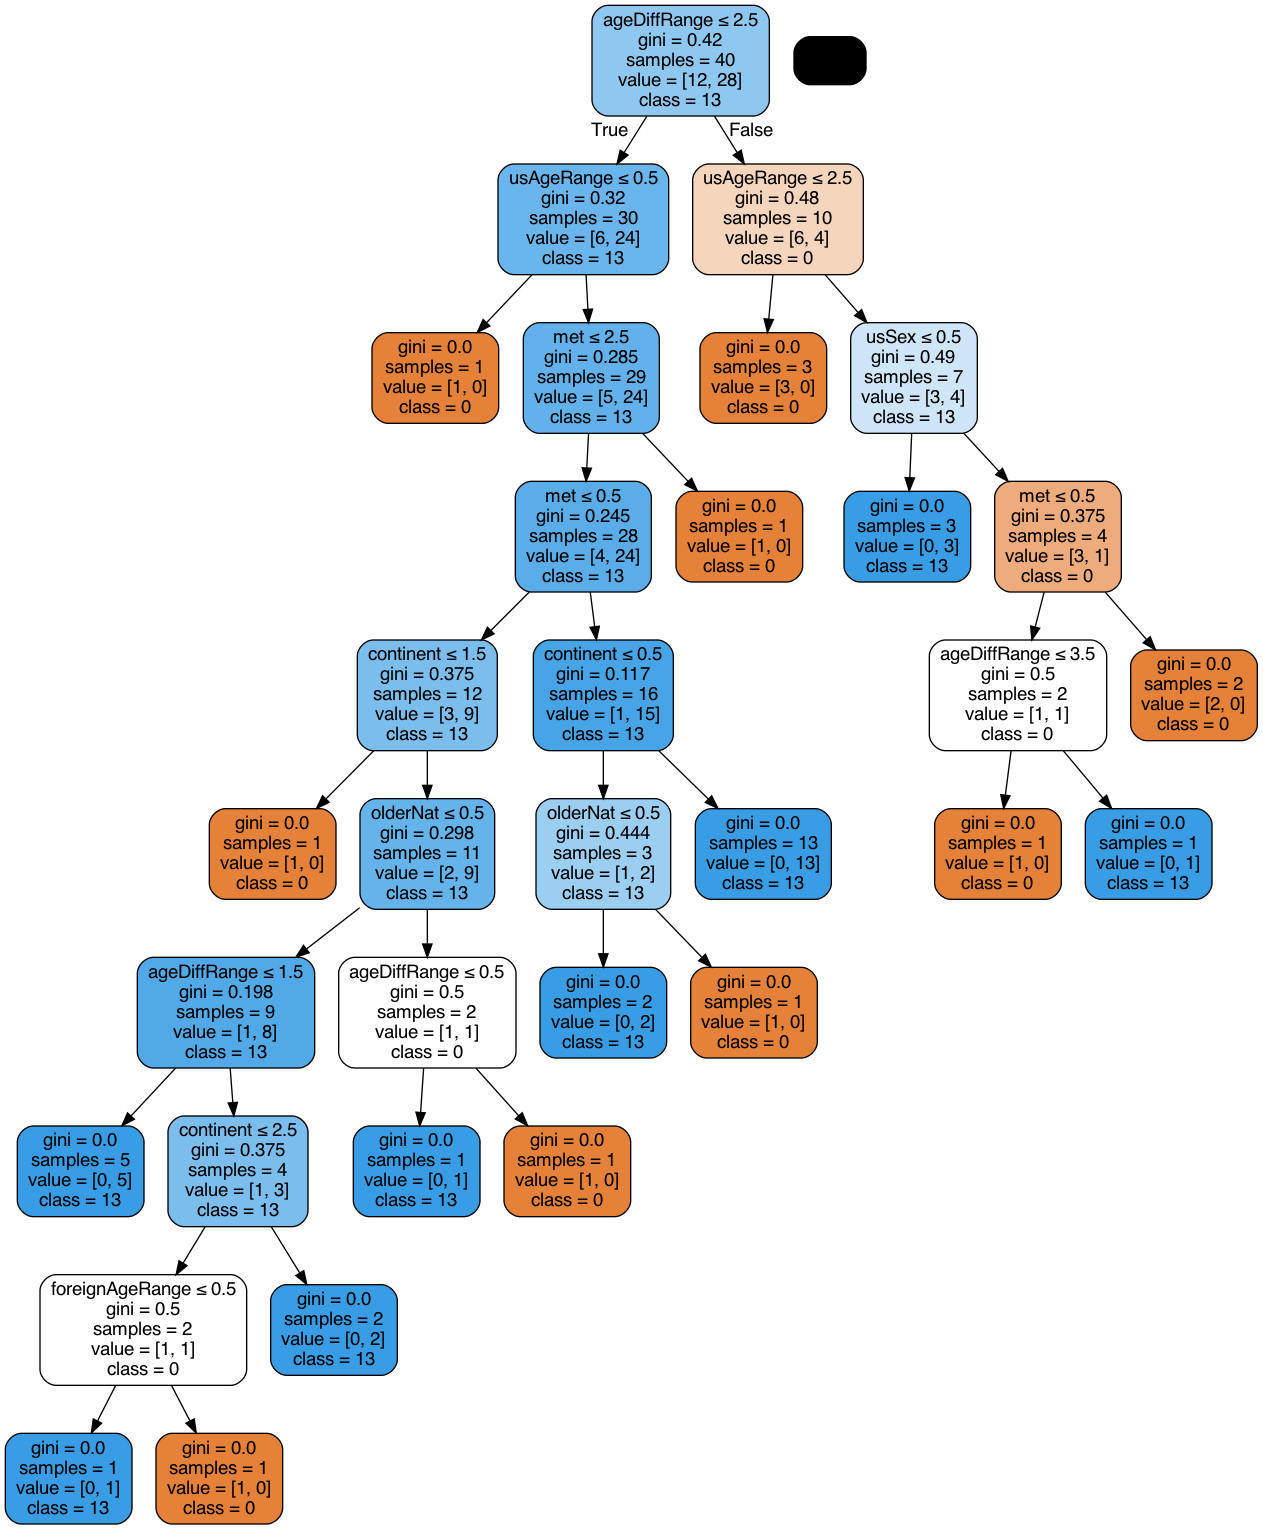

In [27]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','13'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

graph.write_png('fiances.png')

Image(graph.create_png())

*https://www.w3schools.com/python/python_ml_decision_tree.asp*

### Result Explained

* **ageDiff <= 2.5** means ?

* **gini = 0.42** refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle

* **samples = 40** means that there are 40 couples left at this point in the decision, which is all of them since this is the first step

* **value = [12, 28]** means that of these 40 couples, 12 will "stay together", and 28 will not

### Optimizing Decision Tree Performance

* **criterion**: optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* **splitter** : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* **max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy

In [28]:
# create decision tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# train decision tree classifer
clf = clf.fit(X_train,y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5555555555555556


### Visualizing Decision Trees

* pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot

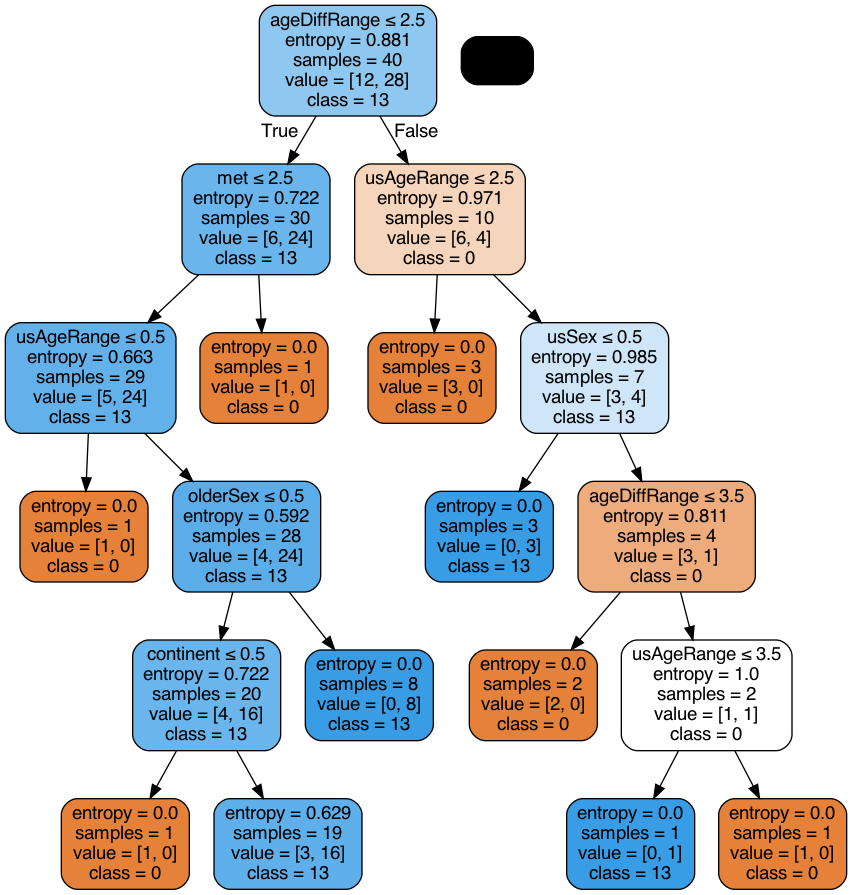

In [29]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features, class_names=['0','13'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('fiances2.png')

Image(graph.create_png())

### Pros

* decision trees are easy to interpret and visualize

* can easily capture Non-linear patterns

* requires fewer data preprocessing from the user, for example, there is no need to normalize columns

* can be used for feature engineering such as predicting missing values, suitable for variable selection

* decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm

### Cons

* sensitive to noisy data - can overfit noisy data

* small variation(or variance) in data can result in the different decision tree - can be reduced by bagging and boosting algorithms

* decision trees are biased with imbalance dataset - recommended that balance out the dataset before creating the decision tree

[Text(0.4166666666666667, 0.9166666666666666, 'X[6] <= 2.5\nentropy = 0.881\nsamples = 40\nvalue = [12, 28]'),
 Text(0.25, 0.75, 'X[8] <= 2.5\nentropy = 0.722\nsamples = 30\nvalue = [6, 24]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[1] <= 0.5\nentropy = 0.663\nsamples = 29\nvalue = [5, 24]'),
 Text(0.08333333333333333, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'X[4] <= 0.5\nentropy = 0.592\nsamples = 28\nvalue = [4, 24]'),
 Text(0.16666666666666666, 0.25, 'X[7] <= 0.5\nentropy = 0.722\nsamples = 20\nvalue = [4, 16]'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.629\nsamples = 19\nvalue = [3, 16]'),
 Text(0.3333333333333333, 0.25, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.3333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.75, 'X[1] <= 2.5\nentropy = 0.

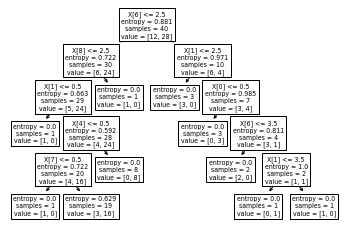

In [30]:
# https://scikit-learn.org/stable/modules/tree.html

tree.plot_tree(clf)